In [24]:
import plot_wien2k as pw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Xas example

In [7]:
r1 = './ex_data/'

In [11]:
xas_exc = pw.Xas(r1 + 'BBO_Bi_Medge_exc.xspec')
xas_gr = pw.Xas(r1 + "BBO_Bi_Medge_gr.xspec")

In [12]:
xas_exc.data.head(2)

,Energy,Intensity
0,-2.00,5.892200e-07
1,-1.98,6.116700e-07


In [13]:
xas_gr.data.head(2)

,Energy,Intensity
0,-2.00,6.263600e-07
1,-1.98,6.502700e-07


In [14]:
xas_gr.get_columns()

Index([u'Energy', u'Intensity'], dtype='object')

In [15]:
#Adding xas_exc in xas_gr
xas_exc << xas_gr

In [16]:
xas_exc.data.head(2)

,Energy,Intensity,Energy_BBO_Bi_Medge_gr,Intensity_BBO_Bi_Medge_gr
0,-2.00,5.892200e-07,-2.00,6.263600e-07
1,-1.98,6.116700e-07,-1.98,6.502700e-07


In [17]:
xas_exc.get_columns()

Index([u'Energy', u'Intensity', u'Energy_BBO_Bi_Medge_gr',
       u'Intensity_BBO_Bi_Medge_gr'],
      dtype='object')

In [18]:
xas = xas_exc

In [20]:
xas.data['del'] = 100 * (1.0 - (xas.data.Intensity / xas.data.Intensity_BBO_Bi_Medge_gr))
xas.data['diff'] = 10*(xas.data.Intensity - xas.data.Intensity_BBO_Bi_Medge_gr)
cols = xas.get_columns()[1::2]

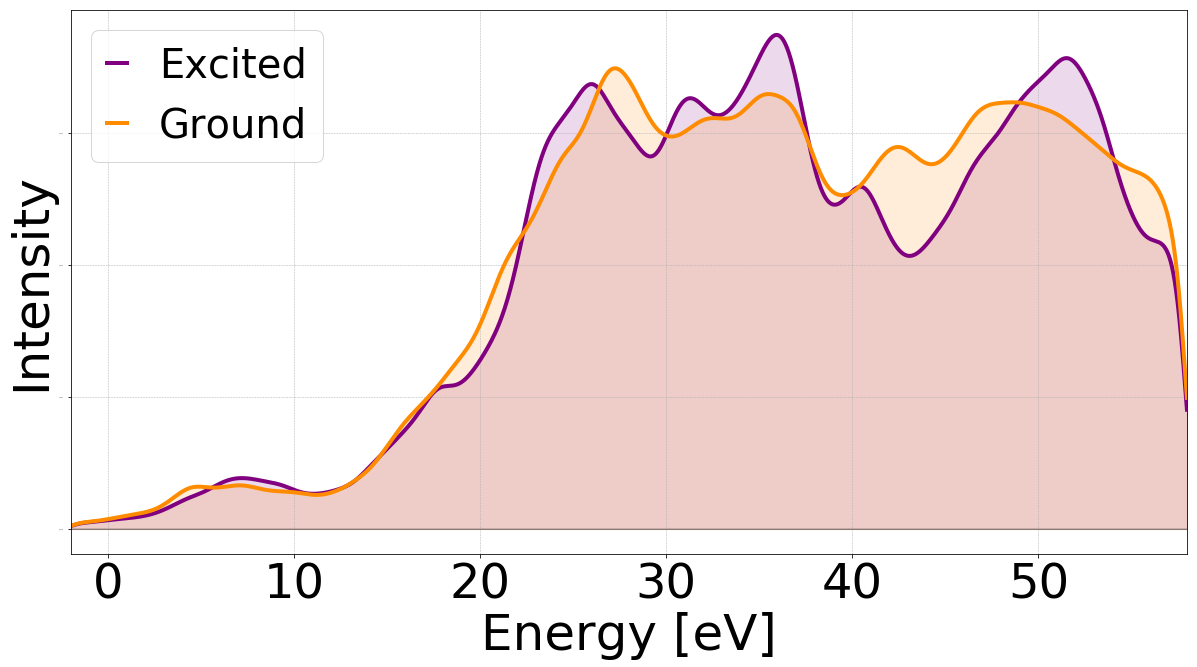

In [33]:
xas.plot(col=cols[:2], names=[r'Excited', 'Ground'], xlab='Energy [eV]', 
         figsize=(20, 10), colors=['purple', 'darkorange'],  ylab='Intensity',  fontsize=50, alpha=0.15,
         ytickslabels=[], zeroline=1, legend_font=40, location='upper left', handlelength=0.5) #save='./Pictures/men_pid/BBO_Bi_Medge')

### DOS example

In [28]:
dos = pw.Dos(route=r1, name='BBO_exc', num=3)

In [30]:
dos.get_columns()

['ENERGY',
 'total_DOS',
 'total1',
 's1',
 'p1',
 'd1',
 'f1',
 'total2',
 's2',
 'p2',
 'd2',
 'f2',
 'total3',
 's3',
 'p3',
 'd3',
 'f3']

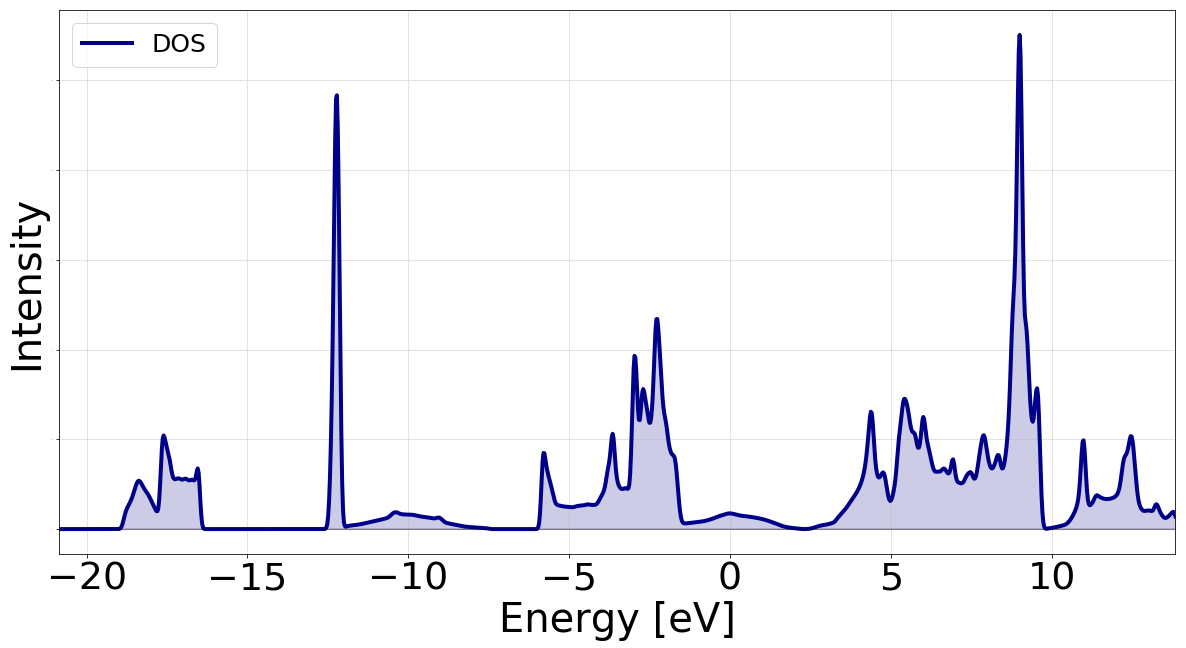

In [38]:
dos.plot(x_axis=['ENERGY'], col=['total_DOS'], 
         names=[r'DOS'], xlab='Energy [eV]', 
         figsize=(20, 10), colors=['darkblue'],  ylab='Intensity',  fontsize=40, alpha=0.2,
         ytickslabels=[], zeroline=1, legend_font = 25)

### Optic example

In [40]:
# here we should specify route to file not directory

In [50]:
new_way = r1 + 'optic.joint'
opt = pw.Optic(new_way)
opt.get_columns()

Index([u'Energy', u'Im_eps_xx', u'Im_eps_zz'], dtype='object')

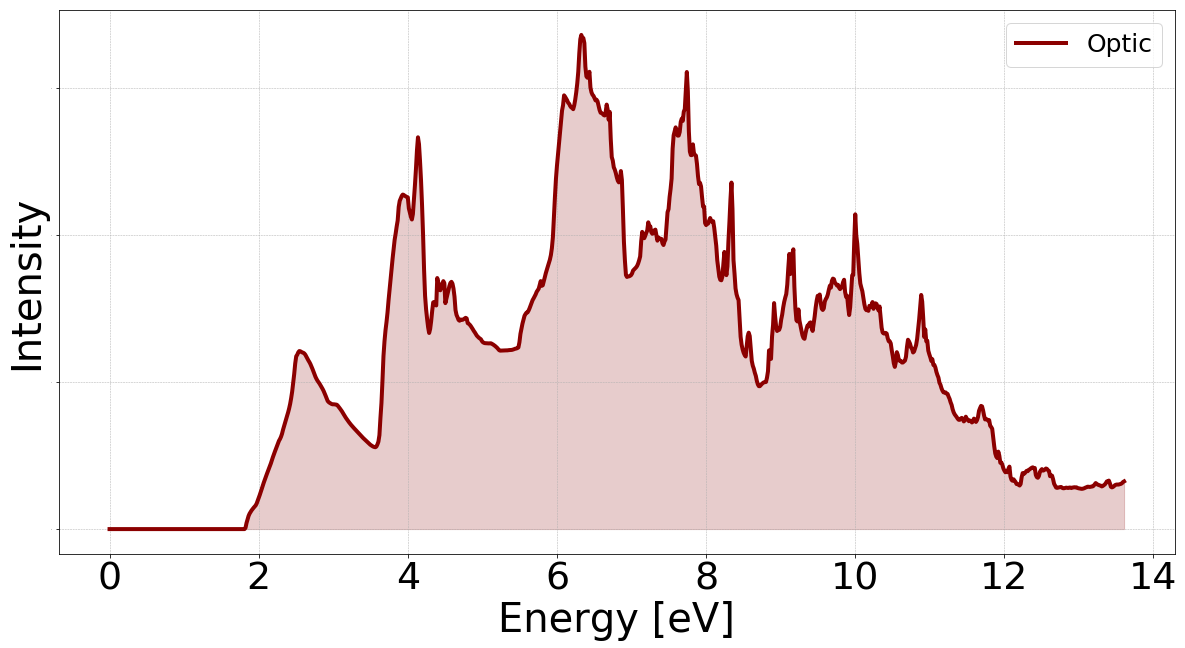

In [57]:
opt.plot(x_axis=[u'Energy'], col=[u'Im_eps_zz'], 
         names=[r'Optic'], xlab='Energy [eV]', 
         figsize=(20, 10), colors=['darkred'],  ylab='Intensity',  fontsize=40, alpha=0.2, ytickslabels=[],
         legend_font = 25)